# Exercise 1

Part 1: (*a*, *a*) &rarr; (*a*, -*a*) &rarr; (-*a*, -*a*) &rarr; (-*a*, *a*) &rarr; (*a*, *a*)  
Part 2: (1 - *a*, *a* - 1) &rarr; (-*a*/4, *a* - 1) &rarr; (-*a*/4, *a*/2) &rarr; (1 - *a*, *a*/2) &rarr; (1 - *a*, *a* - 1)  
Part 3: (*a*/4, *a* - 1) &rarr; (*a* - 1, *a*/2), then (*a* - 1, *a* - 1) &rarr; (*a*/4, *a*/2)  
Part 4: (*a* - 1, -*a*/4) &rarr; (*a* - 1, -*a*/2) &rarr; (1 - *a*, -*a*/2) &rarr; (1 - *a*, -*a*/4)  

To plot the points show above, I will store the x-components and y-components in seperate arrays per part. This is since the method *matplotlib.pyplot.plot(array1, array2)* takes an array of x-components and an array of y-components as parameters. For Part 3, since not all the points are connected, I will split the part into two sections, 3a and 3b, so that each can be plotted separately.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 4
b = 3

parts = np.asarray([
    [[a, a, -a, -a, a], [a, -a, -a, a, a]], #part 1 (x's and y's)
    [[1 - a, -a / 4, -a / 4, 1 - a, 1- a], [a - 1, a - 1, a / 2, a / 2, a - 1]], #part 2 (x's and y's)
    [[a / 4, a - 1], [a - 1, a / 2]], #part 3a (x's and y's)
    [[a - 1, a / 4], [a - 1, a / 2]], #part 3b (x's and y's)
    [[a - 1, a - 1, 1 - a, 1 - a], [-a / 4, -a / 2, -a / 2, -a / 4]] #part 4 (x's and y's)
], dtype=object)

#plot each part on the first subplot
for x in parts:
    plt.subplot(1, 2, 1)
    plt.plot(x[0], x[1])
plt.xlim([-a - 2, a + 2]) #set the range of the x axis
plt.ylim([-a - 1, a + 1]) #set the range of the y axis
plt.title("Before Transformation")

#transformation matrix
matrix = np.asmatrix([
    [1, 1 / b],
    [-1 / b, 1 / b]
])

#array to contain parts after points are transformed
newParts = np.empty(np.shape(parts), dtype=object)

partCount = 0
for part in parts:
    points = list(zip(part[0], part[1])) #combine x and y components to create a list of points
    newPoints = []
    #complete the matrix multiplication for each point
    for point in points:
        point = np.asarray(point)
        newPoint = np.asarray(list(np.dot(matrix, point)))
        newPoints.append(newPoint[0][0])
    xComponents = list(zip(*newPoints))[0]
    yComponents = list(zip(*newPoints))[1]

    #store the transformed points (split into x and y components) into new array
    newParts[partCount, 0] = xComponents
    newParts[partCount, 1] = yComponents

    partCount += 1

print("Points before transformation: ")
#list all the points before the matrix transformation
for i in parts:
    print(list(zip(i[0], i[1])))
print("---")

print("Points after transformation: ")
#list all the points after the matrix transformation
for j in newParts:
    print(list(zip(j[0], j[1])))
print("---")

print("Plotted points before and after transformation: ")
#plot each translated part on the second subplot
for y in newParts:
    plt.subplot(1, 2, 2)
    plt.plot(y[0], y[1])
plt.xlim([-a - 2, a + 2]) #set the range of the x axis
plt.ylim([-a - 1, a + 1]) #set the range of the y axis
plt.title("After Transformation")

plt.show()

#test commit

ModuleNotFoundError: No module named 'numpy'

# Exercise 2

[0, 1.0, 2.0, 3.0, 4.0, 5.0]
[-3, -3.6, -3.3200000000000003, -1.9840000000000004, 0.6191999999999993, 4.743039999999999]
[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0]
[-3, -3.12, -3.2048, -3.252992, -3.2631116799999997, -3.2336361472, -3.162981593088, -3.04950085681152, -2.891480891083981, -2.68714012672734, -2.4346257317964337, -2.1320107610682912, -1.7772911915110228, -1.3683828391714636, -0.9031181527383222, -0.3792428788478551, 0.20558740599823078, 0.8538109022381601, 1.5679633383276865, 2.350681871860794, 3.204709146735226, 4.132897512604635, 5.13821341310882, 6.223741949633173, 7.3926916276185, 8.64839929272324]
[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2

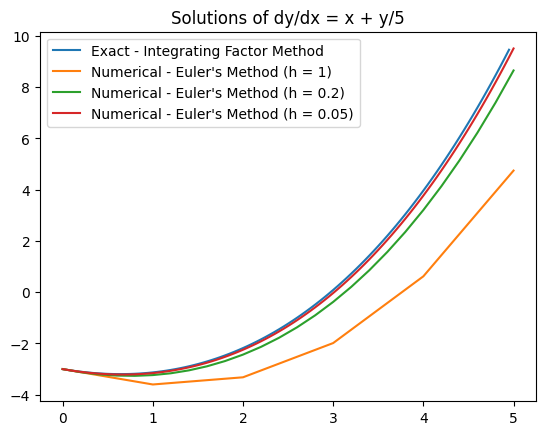

In [1]:
import math
import matplotlib.pyplot as plt

interval = [0, 5] #interval of x values
x0 = 0 #x value of initial condition
y0 = -3 #y value of initial condition

def eulers(stepSize): #function to implement Euler's method
    x = x0
    y = y0
    xComponents = [x]
    yComponents = [y]
    #for each x value in interval
    while x < interval[1]:
        y = y + stepSize*(x + y/5) #newY = oldY + h*f(oldX, oldY) - Euler's method
        yComponents.append(y)
        x += stepSize #increment x by step size
        x = float(format(x, ".2f")) #round x to two decimal points
        xComponents.append(x)
        
    print(xComponents)
    print(yComponents)
    plt.plot(xComponents, yComponents, label="Numerical - Euler's Method (h = " + str(stepSize) + ")") #plot points for Euler's method

def integratingFactor(): #function to implement Integrating Factor method
    xComponents = []
    yComponents = []
    x = 0
    #for each x value in interval
    while x < interval[1]:
        xComponents.append(x)
        y = 22*pow(math.e, x/5) - 5*x - 25 #plot the equation 'y = 22e^(x/5) - 5x - 25' - The derivation of this equation is shown below
        yComponents.append(y)
        x += 0.05 #increment x by a stepsize of 0.05
        x = float(format(x, ".2f")) #round x to two decimal points
        
    plt.plot(xComponents, yComponents, label="Exact - Integrating Factor Method") #plot the points for Integrating Factor method
    

integratingFactor() #call integrating factor method to find exact solution

eulers(1) #call Euler's method with stepsize 1
eulers(0.2) #call Euler's method with stepsize 0.2
eulers(0.05) #call Euler's method with stepsize 0.05

plt.legend()
plt.title("Solutions of dy/dx = x + y/5")
plt.show()

#### Derivation of Equation

The following are the steps of how I derived the equation used in the Integrating Factor method above.

*Differential equation:*

$\qquad \frac{dy}{dx} = x + \frac{y}{5}, \ y(0) = -3 $

*Steps to derive:*

1. Rearrange the equation

$\qquad\qquad \frac{dy}{dx} - \frac{1}{5}y = x $

2. Find the Integrating Factor

$\qquad\qquad e^{\int -\frac{1}{5}x \ dx} $  
$\qquad\qquad = e^{-\frac{1}{5}x} $

3. Multiply equation by Integrating Factor

$\qquad\qquad \frac{dy}{dx}e^{-\frac{1}{5}x} - \frac{1}{5}e^{-\frac{1}{5}x}y = xe^{-\frac{1}{5}x} $  
$\qquad\qquad = \frac{d}{dx}(ye^{-\frac{1}{5}x}) = xe^{-\frac{1}{5}x} $

4. Integrate both sides of the equation

$\qquad\qquad ye^{-\frac{1}{5}x} = \int xe^{-\frac{1}{5}x} \ dx $

$\qquad\qquad$ Using integration by parts for RHS:  
  
$\qquad\qquad\qquad u = x, \ so \ \frac{du}{dx} = 1 $  
$\qquad\qquad\qquad \frac{dv}{dx} = e^{-\frac{1}{5}x}, \ so \ v = -5e^{-\frac{1}{5}x} $  

$\qquad\qquad\qquad I = -5xe^{-\frac{1}{5}x} - \int -5e^{-\frac{1}{5}x} \ dx $  
$\qquad\qquad\qquad = -5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + c $  

$\qquad\qquad$ So, $ ye^{-\frac{1}{5}x} = -5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + c $

5. Find c using the initial condition, y(0) = -3

$\qquad\qquad -3e^{-\frac{1}{5}\times0} = -5 \times 0 \times e^{-\frac{1}{5}\times0} - 25e^{-\frac{1}{5}\times0} + c $  
$\qquad\qquad -3 = 0 -25 + c $  
$\qquad\qquad c = 22 $  

$\qquad\qquad$ So, $ ye^{-\frac{1}{5}x} = -5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + 22 $

6. Make y the subject

$\qquad\qquad y = e^{\frac{1}{5}x}(-5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + 22) $  
$\qquad\qquad y = -5x - 25 + 22e^{\frac{1}{5}x} $

$\qquad\qquad$ So, $ y = 22e^{\frac{1}{5}x} -5x - 25 $

*Derived equation:*

$\qquad y = 22e^{\frac{1}{5}x} -5x - 25 $